# ETDS Project

### Analyzing The Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the language converted dataset
df = pd.read_csv('Steam_Cleaned.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,steam_appid,name,developers,publishers,categories,genres,n_achievements,platforms,is_released,release_date,...,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),lang,name_translated,dev_translated,pub_translated
0,2719580,yong zhe nochuan shuo noyong zhe,ぽけそう,ぽけそう,"Single-player, Family Sharing","Casual, Indie",0,windows,True,2024-01-04,...,0,0,0.0,0,False,0.99,ja,the legendary hero of the hero,Looks like it's going to pop,Looks like it's going to pop
1,2719590,light no fire,Hello Games,Hello Games,"Single-player, Multi-player, Co-op, Online Co-op","Action, Adventure",0,windows,False,NaN,...,0,0,0.0,0,False,0.00,en,light no fire,Hello Games,Hello Games
2,2719600,lorhaven: cursed war,GoldenGod Games,GoldenGod Games,"Single-player, Multi-player, PvP, Shared/Split...","RPG, Strategy",32,"windows, mac",True,2024-01-26,...,0,9,88.9,0,False,9.99,en,lorhaven: cursed war,GoldenGod Games,GoldenGod Games
3,2719610,puiq: demons,Giammnn,Giammnn,"Single-player, Steam Achievements, Family Sharing","Action, Casual, Indie, RPG",28,windows,True,2024-02-17,...,0,0,0.0,0,False,2.99,en,puiq: demons,Giammnn,Giammnn
4,2719650,project xsting,Saucy Melon,Saucy Melon,"Single-player, Steam Achievements, Steam Cloud...","Action, Casual, Indie, Early Access",42,windows,True,2024-01-05,...,0,9,100.0,0,False,7.99,en,project xsting,Saucy Melon,Saucy Melon


In [3]:
df.describe()

,steam_appid,n_achievements,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,price_initial (USD)
count,7.031100e+04,70311.000000,7.031100e+04,7.031100e+04,70311.000000,70311.000000,70311.000000,70311.000000,70311.000000
mean,1.618018e+06,16.251269,4.129935e+02,3.627173e+02,50.276258,2.195617,46.197470,2.580990,6.480681
std,8.616285e+05,139.152493,8.436486e+03,7.452286e+03,1176.769267,3.179098,41.989886,13.615668,12.992899
min,7.300000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.332700e+05,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.538600e+06,0.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,51.100000,0.000000,2.990000
75%,2.385270e+06,16.000000,1.900000e+01,1.400000e+01,4.000000,5.000000,88.200000,0.000000,9.990000
max,3.430140e+06,9821.000000,1.279700e+06,1.107275e+06,172425.000000,9.000000,100.000000,97.000000,999.980000


In [4]:
df.isna().sum()

steam_appid                0
name                       1
developers                 0
publishers                 0
categories                 0
genres                     0
n_achievements             0
platforms                  0
is_released                0
release_date           13267
total_reviews              0
total_positive             0
total_negative             0
review_score               0
review_score_desc          0
positive_percentual        0
metacritic                 0
is_free                    0
price_initial (USD)        0
lang                       0
name_translated            2
dev_translated             0
pub_translated             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.loc[df['name'].isna()]

,steam_appid,name,developers,publishers,categories,genres,n_achievements,platforms,is_released,release_date,...,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),lang,name_translated,dev_translated,pub_translated
2590,2639280,NaN,箱崎奈绪(Hakozaki Nao),箱崎奈绪(Hakozaki Nao),"Single-player, Family Sharing","Adventure, Casual, Indie",0,windows,True,2023-12-29,...,0,0,0.0,0,False,1.99,th,NaN,Hakozaki Nao,Hakozaki Nao


In [7]:
df.shape

(70311, 23)

In [8]:
#Dropping NA value
df = df.loc[df['steam_appid'] != 2639280]
df.shape

(70310, 23)

In [9]:
#Creating a new dataframe to store the burst column values
df1= pd.DataFrame({})

categories_list = ['Single-player',
 'Family Sharing',
 'Multi-player',
 'Co-op',
 'Online Co-op',
 'PvP',
 'Shared/Split Screen PvP',
 'Shared/Split Screen Co-op',
 'Shared/Split Screen',
 'Steam Achievements',
 'Includes level editor',
 'Remote Play Together',
 'Steam Cloud',
 'Full controller support',
 'Stats',
 'HDR available',
 'Tracked Controller Support',
 'VR Only',
 'Online PvP',
 'Partial Controller Support',
 'MMO',
 'Cross-Platform Multiplayer',
 'In-App Purchases',
 'Steam Leaderboards',
 'Steam Workshop',
 'LAN Co-op',
 'Remote Play on TV',
 'Captions available',
 'LAN PvP',
 'Steam Trading Cards',
 'VR Supported',
 'Commentary available',
 'Remote Play on Phone',
 'Remote Play on Tablet',
 'Steam Turn Notifications',
 'Includes Source SDK',
 'Steam Timeline',
 'VR Support',
 'SteamVR Collectibles',
 'Valve Anti-Cheat enabled',
 'Mods',
 'Mods (require HL2)']

In [10]:
#Logic to burst the columns
for i in categories_list:
    df1[i] = df['categories'].str.contains(i)
    

/tmp/ipykernel_41/3324699141.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1[i] = df['categories'].str.contains(i)


In [11]:
df1.head()

,Single-player,Family Sharing,Multi-player,Co-op,Online Co-op,PvP,Shared/Split Screen PvP,Shared/Split Screen Co-op,Shared/Split Screen,Steam Achievements,...,Remote Play on Phone,Remote Play on Tablet,Steam Turn Notifications,Includes Source SDK,Steam Timeline,VR Support,SteamVR Collectibles,Valve Anti-Cheat enabled,Mods,Mods (require HL2)
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#Creating another dataframe for the burst values of the genres
df2 = pd.DataFrame({})

#Unique genres
unique_genre = []
for i in df.genres:
    values = [j for j in str(i).split(', ')]
    for k in values:
        if k not in unique_genre:
            unique_genre.append(k)

unique_genre

['Casual',
 'Indie',
 'Action',
 'Adventure',
 'RPG',
 'Strategy',
 'Early Access',
 'Simulation',
 'Racing',
 'Massively Multiplayer',
 'Sports',
 'Free To Play',
 'Design & Illustration',
 'Photo Editing',
 'Utilities',
 'Video Production',
 'Game Development',
 'Animation & Modeling',
 'Audio Production',
 'Software Training',
 'Web Publishing',
 'Education',
 'Accounting',
 'Violent',
 'Gore',
 'Sexual Content',
 'Nudity',
 'Movie',
 'Documentary',
 'Episodic',
 'Short',
 'Tutorial',
 '360 Video']

In [13]:
#Logic to burst the columns
for i in unique_genre:
    df2[i] = df['genres'].str.contains(i)

df2.head()

,Casual,Indie,Action,Adventure,RPG,Strategy,Early Access,Simulation,Racing,Massively Multiplayer,...,Violent,Gore,Sexual Content,Nudity,Movie,Documentary,Episodic,Short,Tutorial,360 Video
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Creating another dataframe for the burst values of the platforms
df3 = pd.DataFrame({})

#Unique platform
unique_platform = []
for i in df.platforms:
    values = [j for j in str(i).split(', ')]
    for k in values:
        if k not in unique_platform:
            unique_platform.append(k)

unique_platform

['windows', 'mac', 'linux']

In [15]:
#Logic to burst the columns
for i in unique_platform:
    df3[i] = df['platforms'].str.contains(i)

df3.head()

,windows,mac,linux
0,True,False,False
1,True,False,False
2,True,True,False
3,True,False,False
4,True,False,False


<AxesSubplot: >

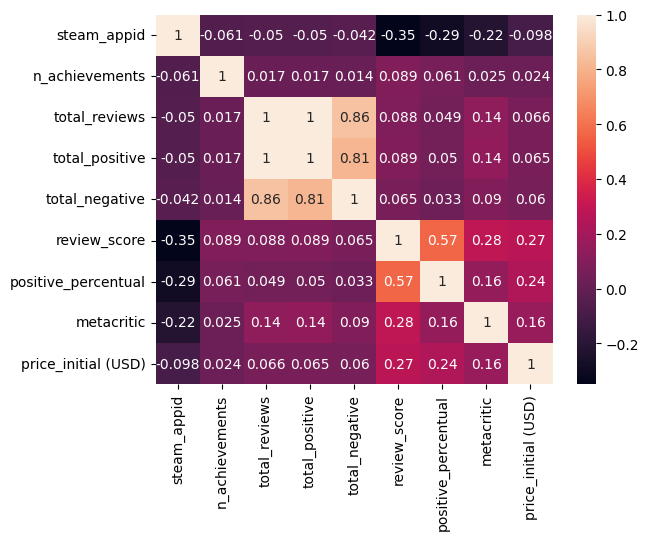

In [16]:
#Correlation Heatmap for the column
cor=df.select_dtypes(include = ['number']).corr()
import seaborn as sns
sns.heatmap(cor, annot = True,cmap='rocket')

In [17]:
df1.columns

Index(['Single-player', 'Family Sharing', 'Multi-player', 'Co-op',
       'Online Co-op', 'PvP', 'Shared/Split Screen PvP',
       'Shared/Split Screen Co-op', 'Shared/Split Screen',
       'Steam Achievements', 'Includes level editor', 'Remote Play Together',
       'Steam Cloud', 'Full controller support', 'Stats', 'HDR available',
       'Tracked Controller Support', 'VR Only', 'Online PvP',
       'Partial Controller Support', 'MMO', 'Cross-Platform Multiplayer',
       'In-App Purchases', 'Steam Leaderboards', 'Steam Workshop', 'LAN Co-op',
       'Remote Play on TV', 'Captions available', 'LAN PvP',
       'Steam Trading Cards', 'VR Supported', 'Commentary available',
       'Remote Play on Phone', 'Remote Play on Tablet',
       'Steam Turn Notifications', 'Includes Source SDK', 'Steam Timeline',
       'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled',
       'Mods', 'Mods (require HL2)'],
      dtype='object')

In [18]:
cols = ['Single-player', 'Family Sharing', 'Multi-player', 'Co-op','PvP', 'MMO',
       'Online Co-op', 'Cross-Platform Multiplayer','Full controller support',
       'VR Support']

<AxesSubplot: >

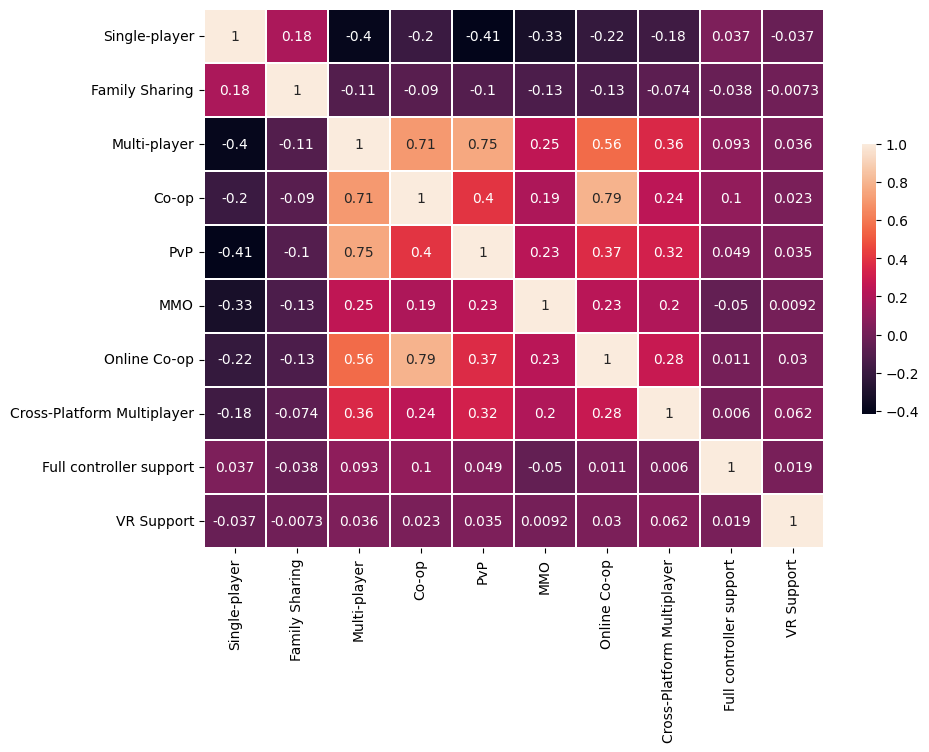

In [19]:
#Correlation heatmap for the categories
plt.figure(figsize=(10, 7))

cor=df1[cols].corr()
import seaborn as sns
sns.heatmap(cor, annot = True, cmap='rocket' ,linewidths=.1, cbar_kws={'shrink': .5})

In [20]:
df2.columns

Index(['Casual', 'Indie', 'Action', 'Adventure', 'RPG', 'Strategy',
       'Early Access', 'Simulation', 'Racing', 'Massively Multiplayer',
       'Sports', 'Free To Play', 'Design & Illustration', 'Photo Editing',
       'Utilities', 'Video Production', 'Game Development',
       'Animation & Modeling', 'Audio Production', 'Software Training',
       'Web Publishing', 'Education', 'Accounting', 'Violent', 'Gore',
       'Sexual Content', 'Nudity', 'Movie', 'Documentary', 'Episodic', 'Short',
       'Tutorial', '360 Video'],
      dtype='object')

In [21]:
cols = ['Casual', 'Indie', 'Action', 'Adventure', 'RPG', 'Strategy','Simulation', 'Racing', 'Massively Multiplayer',
       'Sports', 'Free To Play', 'Design & Illustration', 'Photo Editing',
       'Utilities']

<AxesSubplot: >

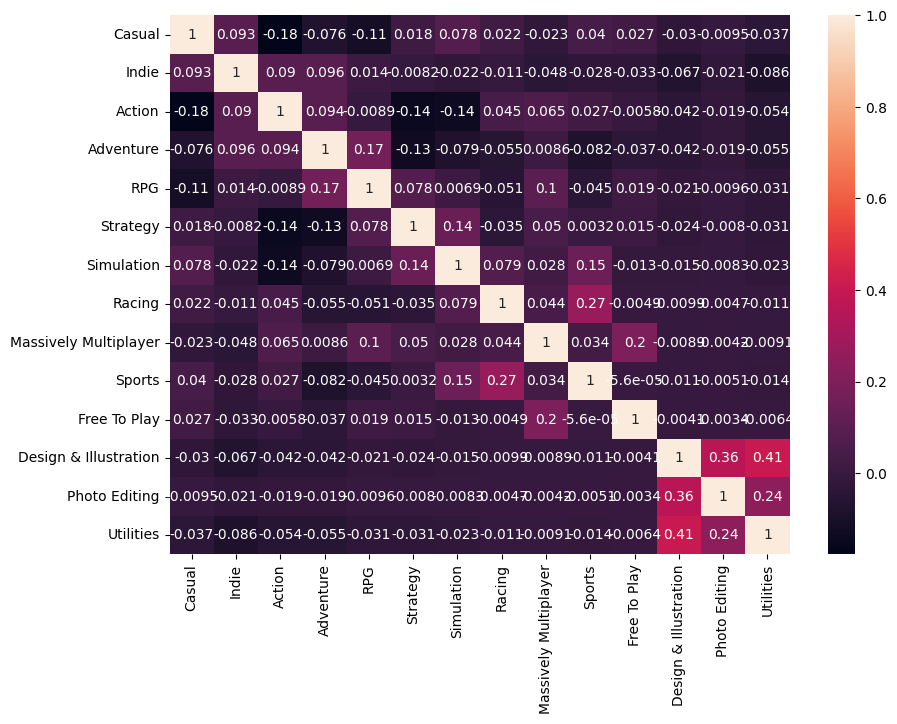

In [22]:
#Correlation heatmap for the genres
plt.figure(figsize = (10,7))
cor=df2[cols].corr()
import seaborn as sns
sns.heatmap(cor, annot = True,cmap='rocket')

In [23]:
combined_df1 = pd.concat([df1, df2], axis=1)
combined_df1.head()

,Single-player,Family Sharing,Multi-player,Co-op,Online Co-op,PvP,Shared/Split Screen PvP,Shared/Split Screen Co-op,Shared/Split Screen,Steam Achievements,...,Violent,Gore,Sexual Content,Nudity,Movie,Documentary,Episodic,Short,Tutorial,360 Video
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [24]:
cols = ['Single-player', 'Family Sharing', 'Multi-player', 'Co-op','PvP',
       'Online Co-op', 'Cross-Platform Multiplayer','Full controller support',
       'VR Support','Casual', 'Indie', 'Action', 'Adventure', 'RPG', 'Strategy','Simulation', 'Racing']

<AxesSubplot: >

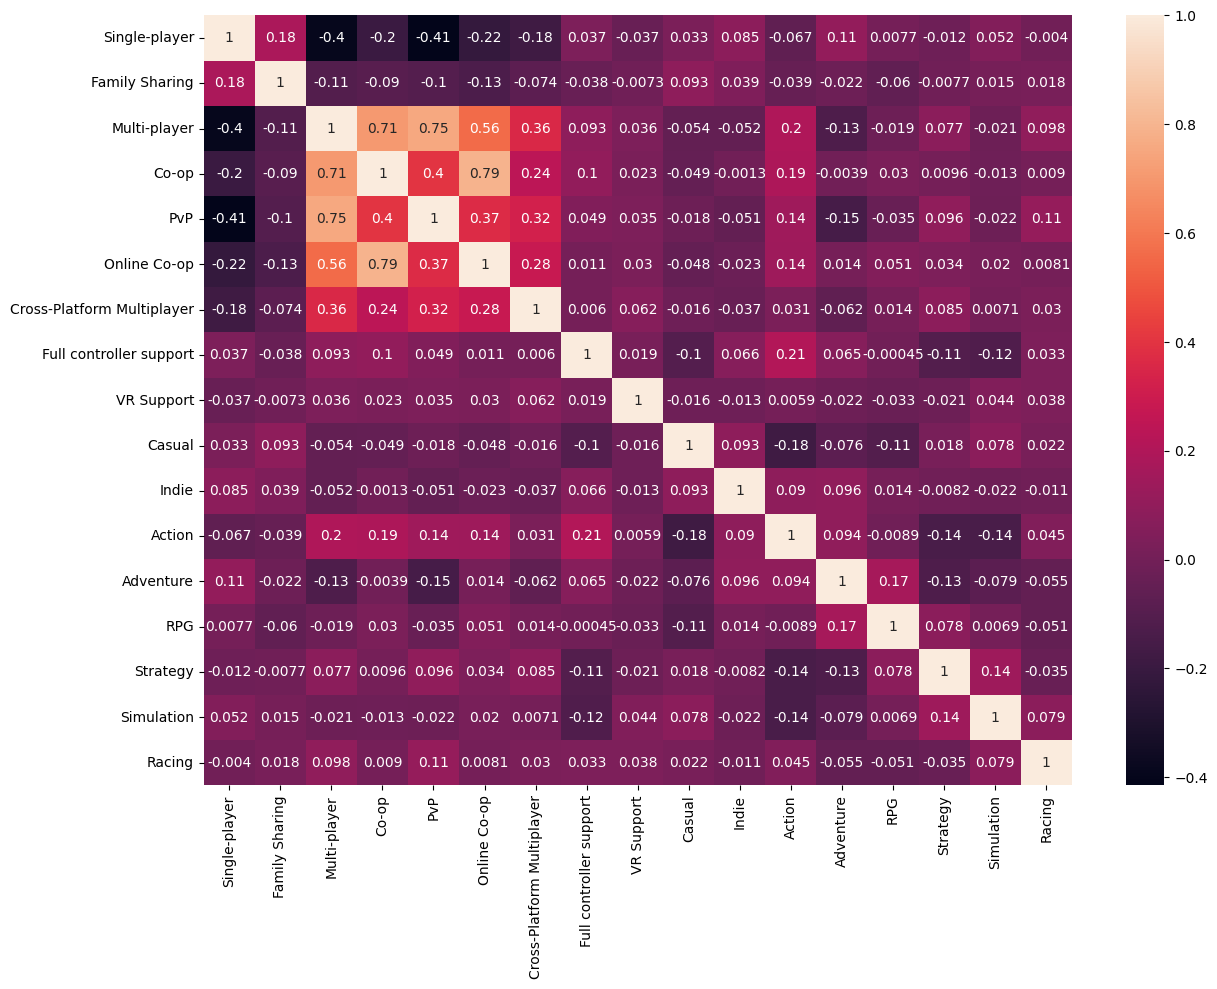

In [25]:
#Correlation heatmap for categories and genres
plt.figure(figsize = (14,10))
cor=combined_df1[cols].corr()
import seaborn as sns
sns.heatmap(cor, annot = True,cmap='rocket')

### Time Series Analysis

In [26]:
#Columns to create time series for
cols = ['is_released', 'release_date', 'price_initial (USD)', 'is_free']

#Creating a dataframe for them
df_time1 = df['release_date'].value_counts().reset_index()
df_time1.dropna(inplace = True)
df_time1.rename(columns = {'release_date':'ds','count':'y'}, inplace = True)
df_time1['ds'] = pd.to_datetime(df_time1['ds'], format = '%Y-%m-%d')
df_time1 = df_time1.loc[df_time1['ds'].between('1995-01-01','2024-12-31')]

In [27]:
df_time1

,ds,y
0,2024-03-28,86
1,2024-02-29,84
2,2024-02-14,80
3,2024-02-23,75
4,2024-03-22,69
...,...,...
4277,2012-09-20,1
4278,2012-02-24,1
4279,2013-07-11,1
4280,2012-02-08,1


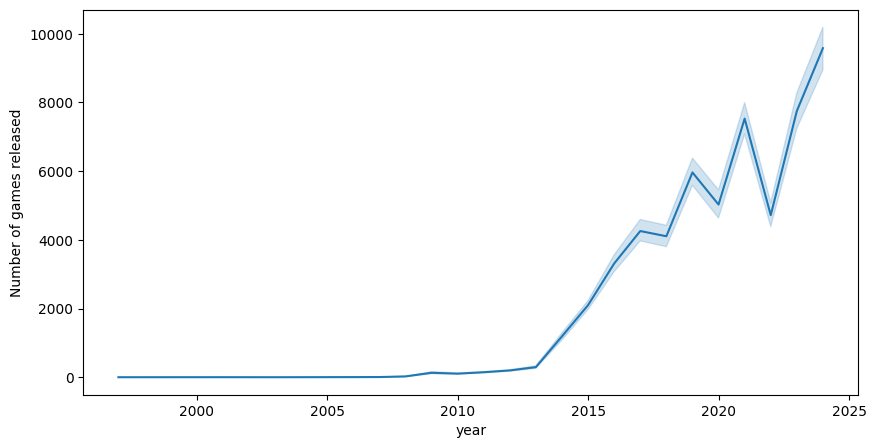

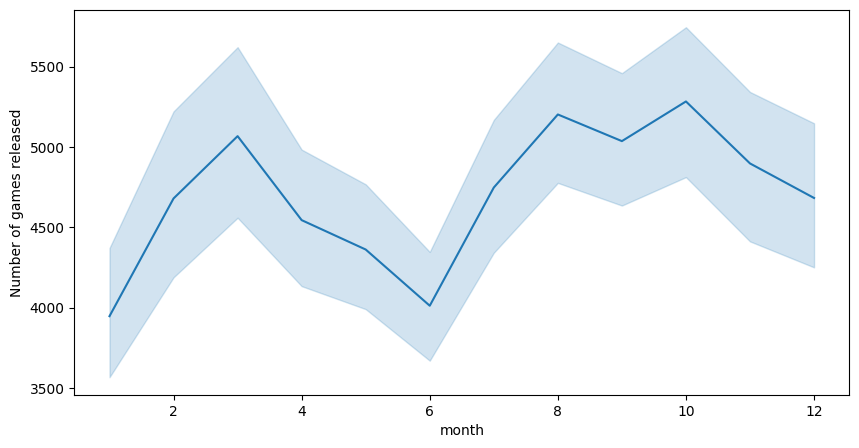

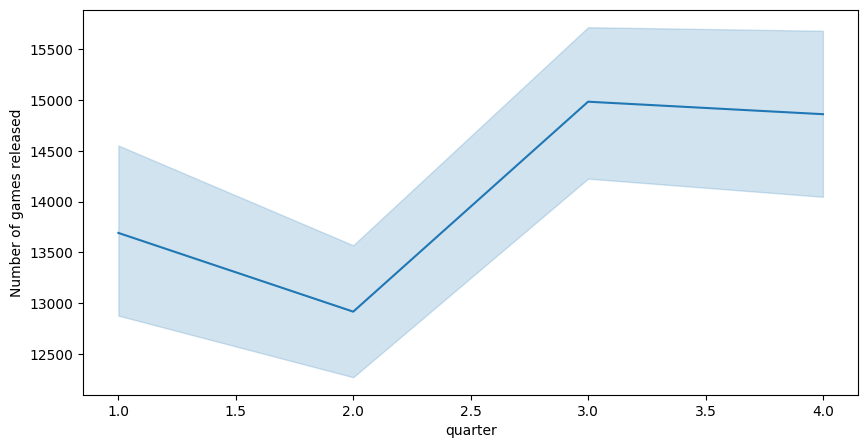

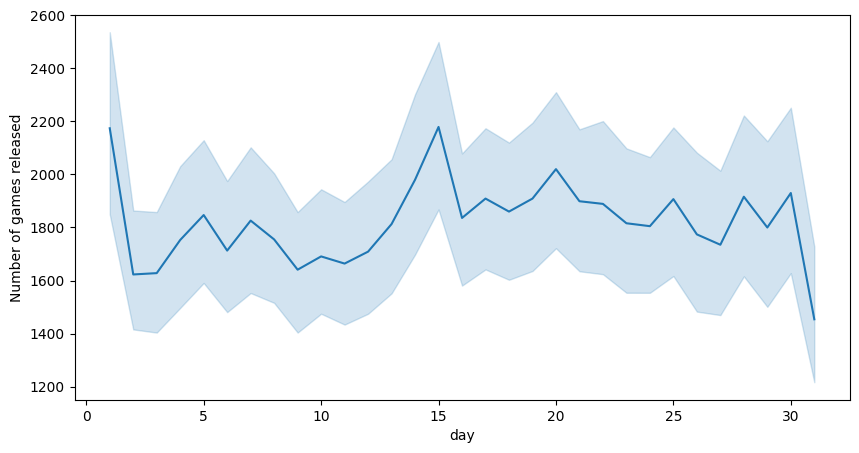

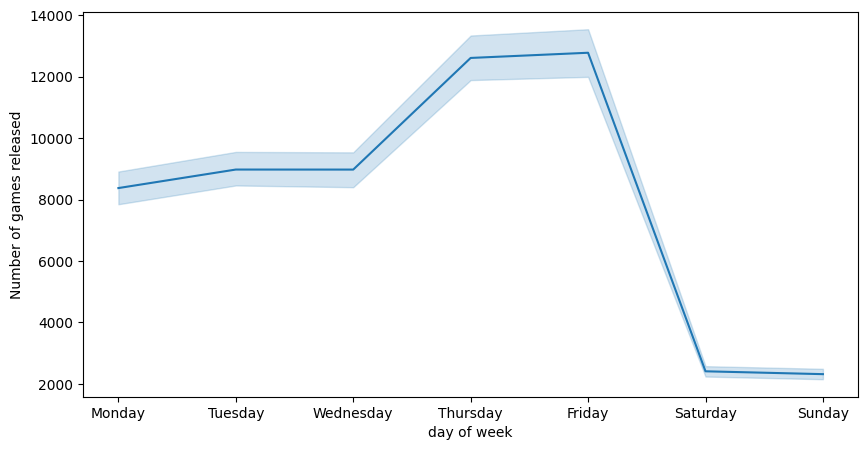

In [28]:
#Checking release of dates by year, month, quarter and day
df_time2 = df_time1.copy()
df_time2['ds'] = pd.to_datetime(df_time1['ds'], format = '%Y-%m-%d')
df_time2['year'] = df_time2['ds'].dt.year
df_time2['month'] = df_time2['ds'].dt.month
df_time2['quarter'] = df_time2['ds'].dt.quarter
df_time2['day'] = df_time2['ds'].dt.day
df_time2['day of week'] = df_time2['ds'].dt.dayofweek
df_time2['day of week'] = df_time2['day of week']

plt.figure(figsize = (10,5))
sns.lineplot(x = 'year', y = 'y', data = df_time2, estimator='sum')
plt.ylabel('Number of games released')
plt.show()

plt.figure(figsize = (10,5))
sns.lineplot(x = 'month', y = 'y', data = df_time2, estimator='sum')
plt.ylabel('Number of games released')
plt.show()

plt.figure(figsize = (10,5))
sns.lineplot(x = 'quarter', y = 'y', data = df_time2, estimator='sum')
plt.ylabel('Number of games released')
plt.show()

plt.figure(figsize = (10,5))
sns.lineplot(x = 'day', y = 'y', data = df_time2, estimator='sum')
plt.ylabel('Number of games released')
plt.show()

plt.figure(figsize = (10,5))
sns.lineplot(x = 'day of week', y = 'y', data = df_time2, estimator='sum')
plt.ylabel('Number of games released')
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [29]:
df_time2['year'].unique()

array([2024, 2023, 2021, 2020, 2019, 2022, 2016, 2017, 2018, 2014, 2015,
       2009, 2013, 2010, 2012, 2011, 2007, 2008, 2006, 2005, 1997, 2001,
       2003], dtype=int32)

In [30]:
df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d')
df.loc[df['release_date'].dt.year == 1997]

,steam_appid,name,developers,publishers,categories,genres,n_achievements,platforms,is_released,release_date,...,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),lang,name_translated,dev_translated,pub_translated
25170,282010,carmageddon max pack,Stainless Games Ltd,THQ Nordic,"Single-player, Multi-player, Steam Trading Car...","Action, Indie, Racing",0,windows,True,1997-06-30,...,8,Very Positive,86.5,0,False,9.99,en,carmageddon max pack,Stainless Games Ltd,THQ Nordic


In [31]:
!pip install prophet==1.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 22.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [32]:
#Creating a prophet object
from prophet import Prophet
m = Prophet()
m.fit(df_time1)
future = m.make_future_dataframe(periods=365)
future.tail()

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:57:27 - cmdstanpy - INFO - Chain [1] start processing
09:57:27 - cmdstanpy - INFO - Chain [1] done processing


,ds
4619,2025-12-27
4620,2025-12-28
4621,2025-12-29
4622,2025-12-30
4623,2025-12-31


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4619,2025-12-27,17.156744,6.948329,26.273876
4620,2025-12-28,16.521063,7.155610,25.996634
4621,2025-12-29,28.617498,19.671465,38.124468
4622,2025-12-30,29.373518,20.311953,38.510086
4623,2025-12-31,29.305516,20.260545,39.306120


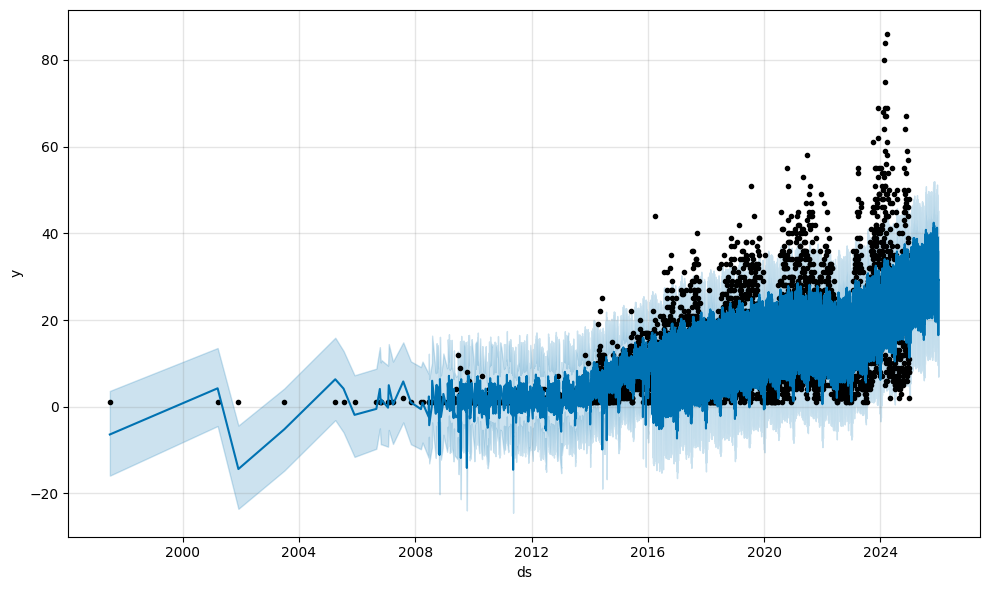

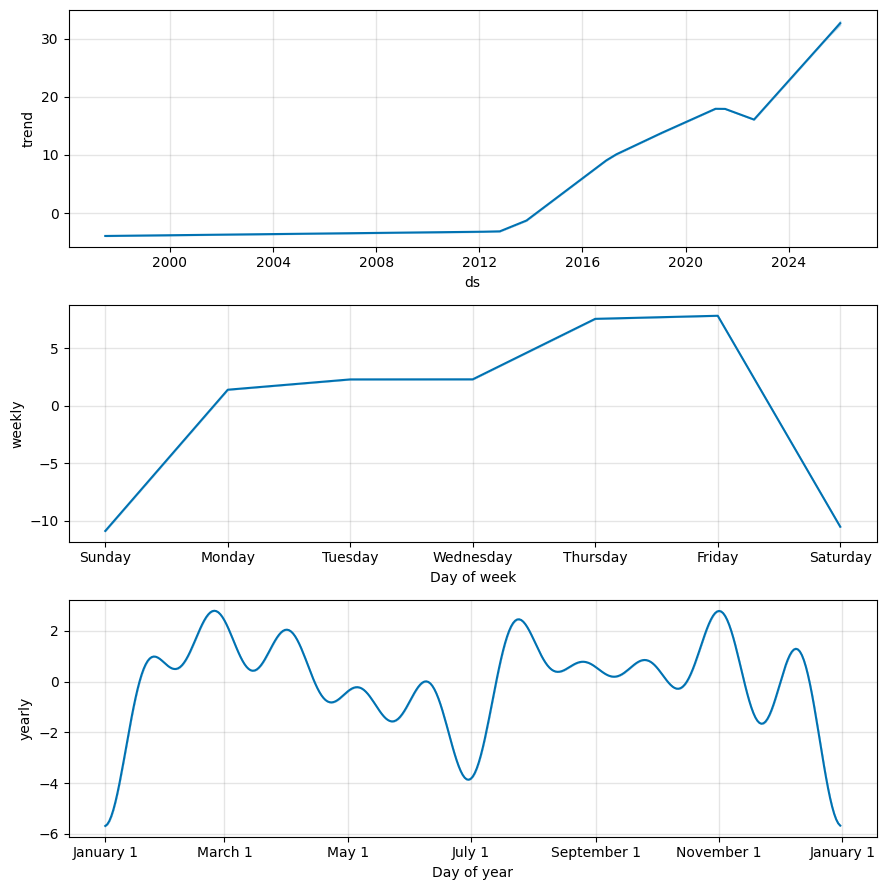

In [34]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [35]:
from prophet import Prophet
m = Prophet()
m.fit(df_time1)
future = m.make_future_dataframe(periods=1, freq = 'MS')

09:57:30 - cmdstanpy - INFO - Chain [1] start processing
09:57:30 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4255,2024-12-28,11.873015,2.439815,21.464168
4256,2024-12-29,11.313211,1.920856,20.922472
4257,2024-12-30,23.490546,13.853468,32.570489
4258,2024-12-31,24.330689,14.497854,34.417547
4259,2025-01-01,24.348172,15.135002,34.632020


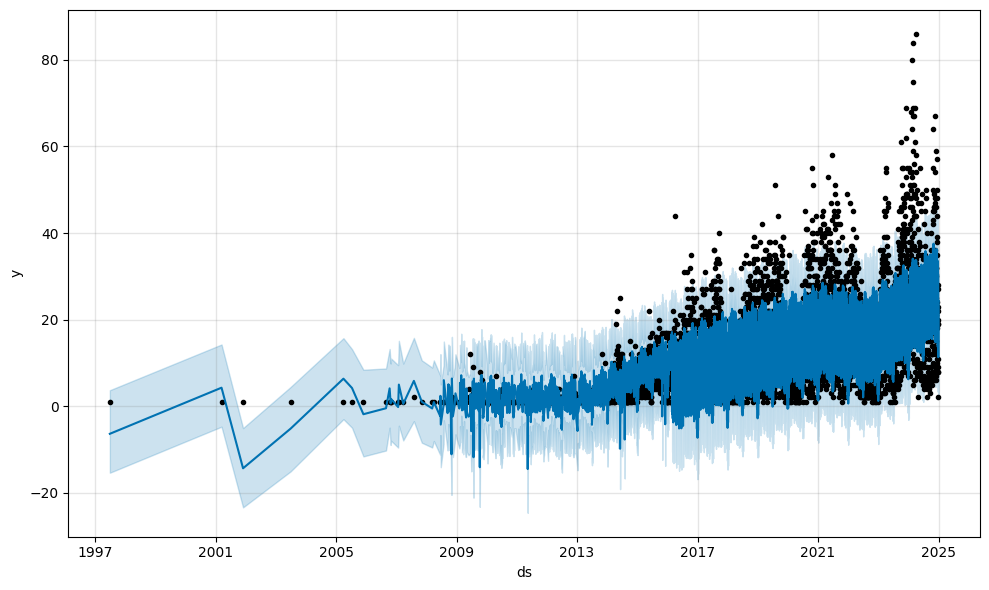

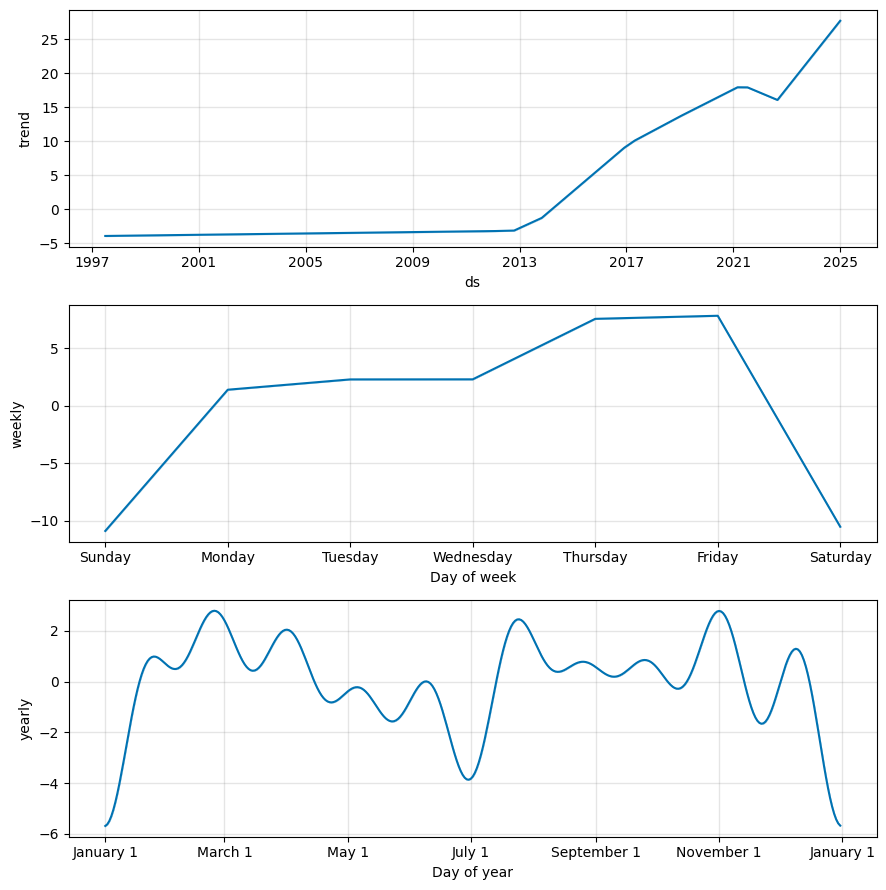

In [37]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

# Creating a Final Dataset with the combined columns

In [38]:
# Combining all the dataframes (df, df1, df2, df3) into a single dataframe
final_df = pd.concat([df.reset_index(drop=True), df1, df2, df3], axis=1)
final_df.drop(columns = ['categories','genres','platforms'], inplace = True)
final_df

,steam_appid,name,developers,publishers,n_achievements,is_released,release_date,total_reviews,total_positive,total_negative,...,Nudity,Movie,Documentary,Episodic,Short,Tutorial,360 Video,windows,mac,linux
0,2719580.0,yong zhe nochuan shuo noyong zhe,ぽけそう,ぽけそう,0.0,True,2024-01-04,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,2719590.0,light no fire,Hello Games,Hello Games,0.0,False,NaT,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2,2719600.0,lorhaven: cursed war,GoldenGod Games,GoldenGod Games,32.0,True,2024-01-26,9.0,8.0,1.0,...,False,False,False,False,False,False,False,True,True,False
3,2719610.0,puiq: demons,Giammnn,Giammnn,28.0,True,2024-02-17,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,2719650.0,project xsting,Saucy Melon,Saucy Melon,42.0,True,2024-01-05,9.0,9.0,0.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,2294300.0,touchdown pinball,Super PowerUp Games,Super PowerUp Games,15.0,True,2024-02-09,2.0,2.0,0.0,...,False,False,False,False,False,False,False,True,False,False
70307,2294250.0,speed golf royale,Mainframe Games,Mainframe Games,0.0,False,NaT,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
70308,2294160.0,isle of swaps,Fuzz Force,Fuzz Force,29.0,True,2024-09-27,72.0,66.0,6.0,...,False,False,False,False,False,False,False,True,False,False
70309,2294130.0,goobies,Knifes,Knifes,43.0,True,2023-07-14,1442.0,1312.0,130.0,...,False,False,False,False,False,False,False,True,False,False


In [39]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 38.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [40]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

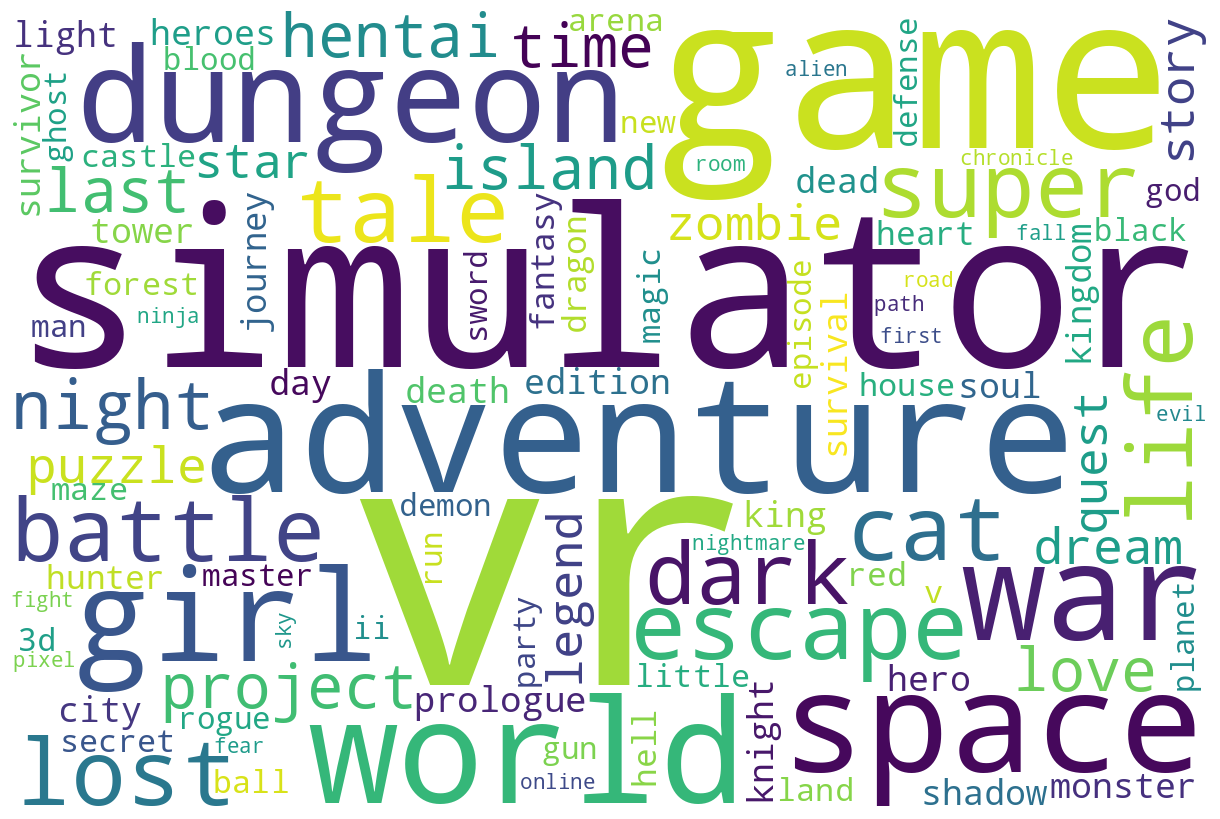

In [41]:
#Creating wordcloud for game names based on Indie genre
df_indie = df.loc[df['genres'].str.contains('Indie'), 'name_translated']

#Creating a wordcloud of the words used in games names for the Indie genre
from wordcloud import WordCloud, STOPWORDS

comment_words = ''

# iterate through the csv file
for val in df_indie:
    # split the value
    tokens = str(val).split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

stopwords = set(STOPWORDS)
stopwords.update(['one','season','chapter','clicker','x'])

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10, stopwords = stopwords, max_words = 100).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

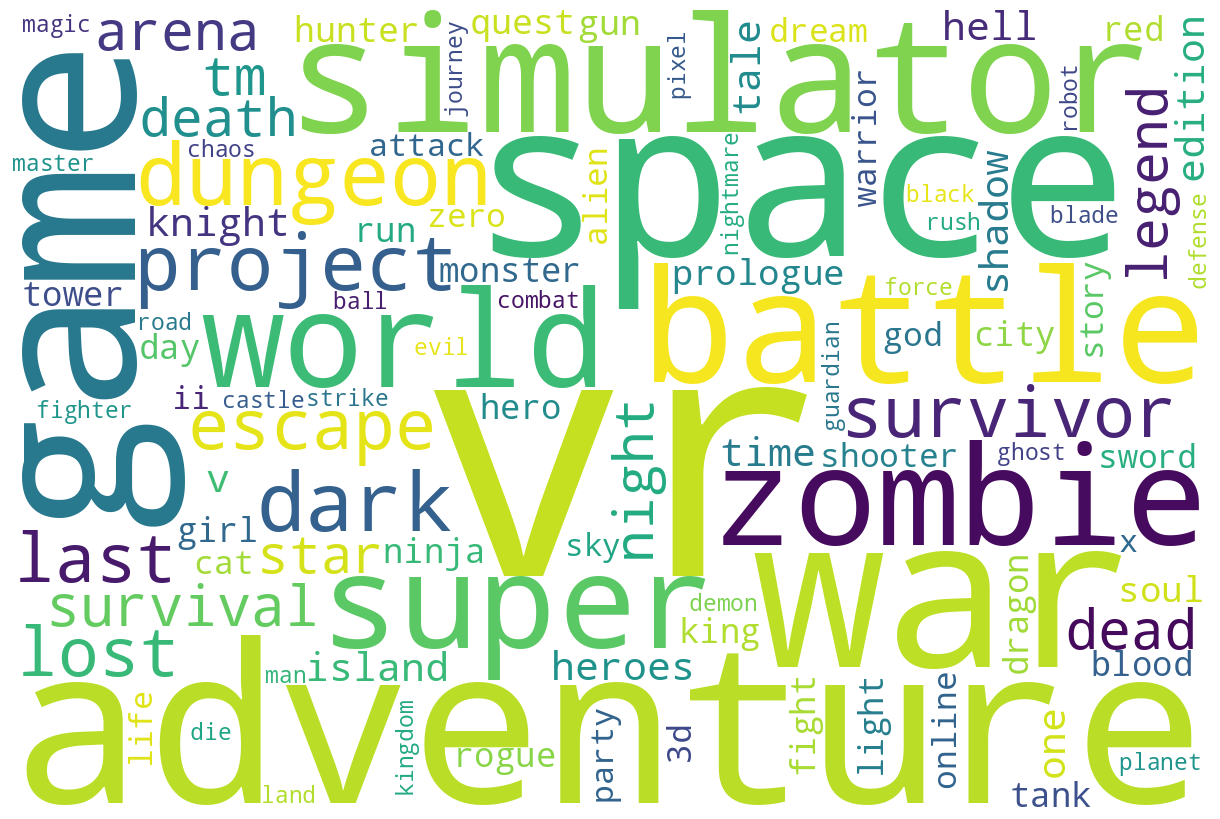

In [42]:
#Creating wordcloud for game names based on Action genre
df_indie = df.loc[df['genres'].str.contains('Action'), 'name_translated']

#Creating a wordcloud of the words used in games names for the Indie genre
from wordcloud import WordCloud, STOPWORDS

comment_words = ''

# iterate through the csv file
for val in df_indie:
    # split the value
    tokens = str(val).split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

stopwords = set(STOPWORDS)
stopwords.update(['one','season','chapter','clicker','x'])

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10, max_words = 100).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f41ae5ec-cd80-41af-a26e-8dd8817d4008' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>